In [19]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from efficientnet_pytorch import EfficientNet
import torch
import torch.nn as nn
from choso_module import ai as chosoai
import cv2
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from PIL import Image

In [3]:
# あなたのモデルのパスを指定します
model_path = r'C:\ex\sen\finetuning\runs\train\maxsquare_color_efficientnet-b5-fold5output_1\model_weights.pth'
model, input_size = chosoai.initialize_model(model_name="efficientnet-b5", num_classes=2, feature_extract=False, use_pretrained=True)
model.load_state_dict(torch.load(model_path))

# モデルを評価モードに設定します
model.eval()

Loaded pretrained weights for efficientnet-b5


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        48, 12, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        12, 48, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [51]:
target_layers = [model._conv_head]
cam = GradCAM(model = model, target_layers = target_layers, use_cuda = torch.cuda.is_available())

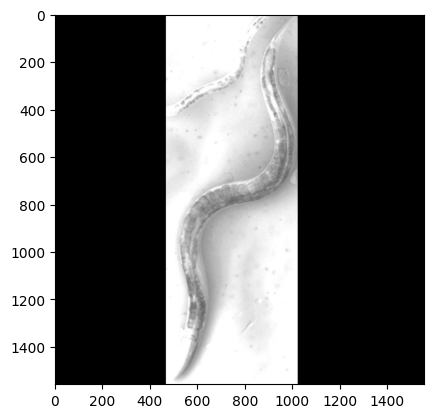

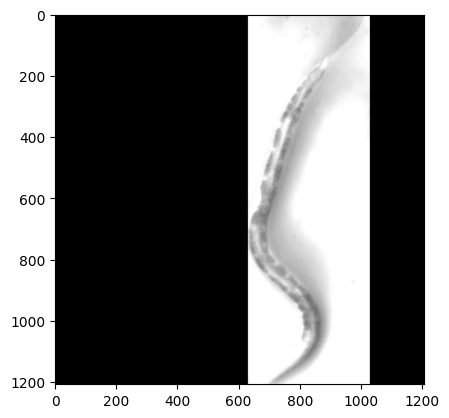

In [52]:
visible_image = cv2.imread(r"D:\ex\egg\data\jpeg\rectangle\folds_color\fold5\val\visible\006_000.png",cv2.COLOR_BGR2RGB)
invisible_image = cv2.imread(r"D:\ex\egg\data\jpeg\rectangle\folds_color\fold5\val\invisible\007_000.png",cv2.COLOR_BGR2RGB)
plt.imshow(visible_image)
plt.show()
plt.imshow(invisible_image)
plt.show()

In [53]:
data_transforms = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [54]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)
visible_input_image = Image.fromarray(visible_image)
visible_input_image = data_transforms(visible_input_image).unsqueeze(0).to(DEVICE)
invisible_input_image = Image.fromarray(invisible_image)
invisible_input_image = data_transforms(invisible_input_image).unsqueeze(0).to(DEVICE)


cuda


In [55]:
with torch.no_grad():
    visible_output = model(visible_input_image)
    invisible_output = model(invisible_input_image)

In [56]:
# Compute softmax over the outputs to get probabilities
visible_probs = torch.nn.functional.softmax(visible_output, dim=1)
invisible_probs = torch.nn.functional.softmax(invisible_output, dim=1)
# Get the predicted classes
visible_pred_class = torch.argmax(visible_probs, dim=1)
invisible_pred_class = torch.argmax(invisible_probs, dim=1)
# Print the predicted classes
print(visible_pred_class.item())
print(invisible_pred_class.item())

1
0


In [66]:
input_tensor = visible_input_image #(batch_size, channel, height, width)
vis_image = cv2.resize(visible_image, (456, 456)) / 255.0 #(height, width, channel), [0, 1]
label = [ClassifierOutputTarget(1)] #犬のラベルは０
print(input_tensor.shape, vis_image.shape)

torch.Size([1, 3, 456, 456]) (456, 456, 3)


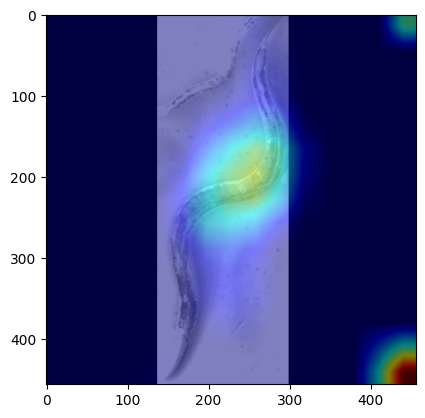

In [67]:
grayscale_cam = cam(input_tensor = input_tensor, targets = label)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(vis_image, grayscale_cam, use_rgb = True)
plt.imshow(visualization)
plt.show()

In [64]:
input_tensor = visible_input_image #(batch_size, channel, height, width)
vis_image = cv2.resize(visible_image, (456, 456)) / 255.0 #(height, width, channel), [0, 1]
label = [ClassifierOutputTarget(0)] #犬のラベルは０
print(input_tensor.shape, vis_image.shape)

torch.Size([1, 3, 456, 456]) (456, 456, 3)


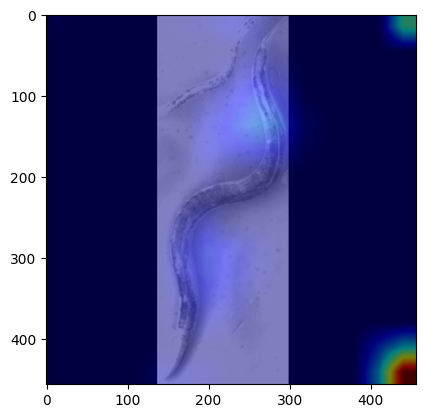

In [65]:
grayscale_cam = cam(input_tensor = input_tensor, targets = label)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(vis_image, grayscale_cam, use_rgb = True)
plt.imshow(visualization)
plt.show()

torch.Size([1, 3, 456, 456]) (456, 456, 3)


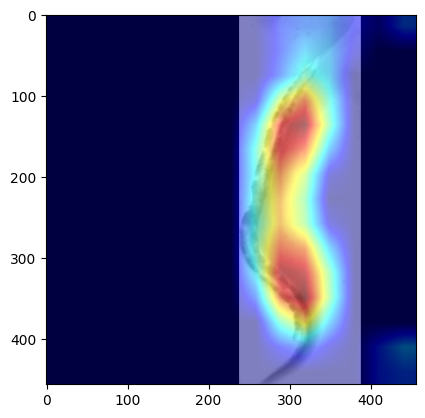

In [72]:
input_tensor = invisible_input_image #(batch_size, channel, height, width)
vis_image = cv2.resize(invisible_image, (456, 456)) / 255.0 #(height, width, channel), [0, 1]
label = [ClassifierOutputTarget(0)] #犬のラベルは０
print(input_tensor.shape, vis_image.shape)
grayscale_cam = cam(input_tensor = input_tensor, targets = label)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(vis_image, grayscale_cam, use_rgb = True)
plt.imshow(visualization)
plt.show()

torch.Size([1, 3, 456, 456]) (456, 456, 3)


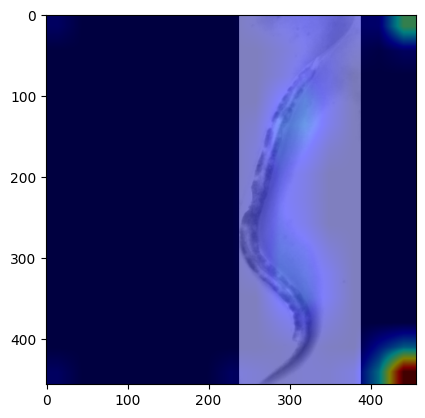

In [71]:
input_tensor = invisible_input_image #(batch_size, channel, height, width)
vis_image = cv2.resize(invisible_image, (456, 456)) / 255.0 #(height, width, channel), [0, 1]
label = [ClassifierOutputTarget(1)] #犬のラベルは０
print(input_tensor.shape, vis_image.shape)
grayscale_cam = cam(input_tensor = input_tensor, targets = label)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(vis_image, grayscale_cam, use_rgb = True)
plt.imshow(visualization)
plt.show()